In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../tools")
plt.rcParams["font.size"] = 17


# t

In [4]:
radii = pd.read_csv("radii.csv")
radii

,d1,d2
0,323,316
1,500,505
2,630,629
3,740,736
4,831,835


In [5]:
radii["r"] = (radii["d1"]+radii["d2"])/4
radii["r mum"] = radii["r"]*2.8
radii["r mum 2"] = radii["r mum"]**2
radii["shift"] = radii["r mum 2"].diff(1)
radii["shift mm"] = radii["shift"]*1e-6
radii["t"] = 65**2*(546.07)*1e-6/radii["shift mm"]

In [6]:
radii

,d1,d2,r,r mum,r mum 2,shift,shift mm,t
0,323,316,159.75,447.3,200077.29,NaN,NaN,NaN
1,500,505,251.25,703.5,494912.25,294834.96,0.294835,7.825211
2,630,629,314.75,881.3,776689.69,281777.44,0.281777,8.187830
3,740,736,369.00,1033.2,1067502.24,290812.55,0.290813,7.933446
4,831,835,416.50,1166.2,1360022.44,292520.20,0.292520,7.887133


In [7]:
t_avg = np.average(radii["t"][1:])
t_avg

7.958405057103262

## Circles

In [2]:
br = pd.read_csv("br.csv")
br

,da,db,dc
0,233,310,380
1,453,495,540
2,597,627,664
3,709,739,768


In [9]:
br = br/2
br

,da,db,dc
0,116.5,155.0,190.0
1,226.5,247.5,270.0
2,298.5,313.5,332.0
3,354.5,369.5,384.0


In [10]:
br**2

,da,db,dc
0,13572.25,24025.00,36100.0
1,51302.25,61256.25,72900.0
2,89102.25,98282.25,110224.0
3,125670.25,136530.25,147456.0


In [11]:
br2 = br**2*(2.8)**2*1e-6
br2

,da,db,dc
0,0.106406,0.188356,0.283024
1,0.402210,0.480249,0.571536
2,0.698562,0.770533,0.864156
3,0.985255,1.070397,1.156055


In [12]:
br2["db"]-br2["da"]

0    0.081950
1    0.078039
2    0.071971
3    0.085142
dtype: float64

In [13]:
delab = (br2["db"]-br2["da"]).mean()
delab

0.07927562999999999

In [14]:
br2["db"]-br2["dc"]

0   -0.094668
1   -0.091287
2   -0.093623
3   -0.085658
dtype: float64

In [15]:
delbc = (br2["db"]-br2["dc"]).mean()
delbc

-0.09130904999999995

In [16]:
br2.iloc[1]-br2.iloc[0]

da    0.295803
db    0.291893
dc    0.288512
dtype: float64

In [17]:
del12 = (br2.iloc[1]-br2.iloc[0]).mean()
del12

0.2920693999999999

In [18]:
br2.iloc[1]-br2.iloc[2]

da   -0.296352
db   -0.290284
dc   -0.292620
dtype: float64

In [19]:
del23 = -(br2.iloc[1]-br2.iloc[2]).mean()
del23

0.29308533333333325

In [20]:
br2.iloc[3]-br2.iloc[2]

da    0.286693
db    0.299864
dc    0.291899
dtype: float64

In [21]:
del34 = (br2.iloc[3]-br2.iloc[2]).mean()
del34

0.2928187733333334

In [22]:
delta_avg =(del12+del23+del34)/3
delta_avg

0.2926578355555555

In [23]:
Vba = delab/(2*t_avg*delta_avg)*(1e3)
Vba

17.01858744539594

In [24]:
Vbc = -delbc/(2*t_avg*delta_avg)*(1e3)
Vbc

19.601875784286165

In [25]:
BI = pd.read_csv("BI.csv")

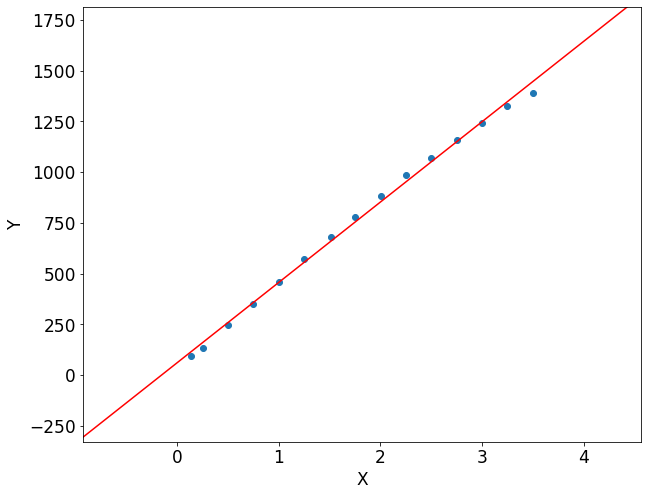

In [26]:
from maths.algebra import CurveFitting

cf = CurveFitting()
result = cf.fit(BI["I"],BI["B"], order = 1, plot=True)


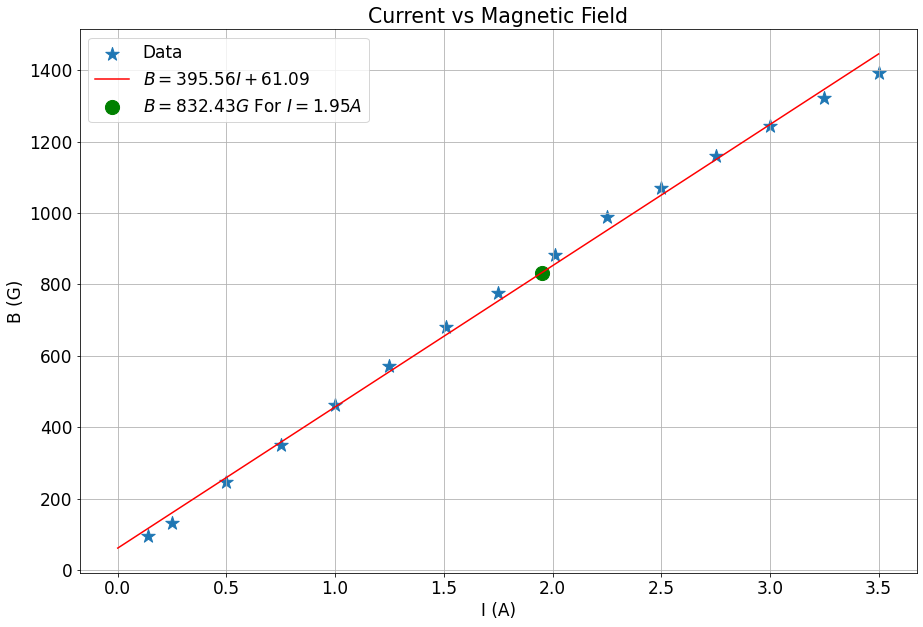

In [28]:
c = result[0][0]
m = result[0][1]
X = np.linspace(0, BI["I"].max(), 200)
Y = m*X+c
I = 1.95
B = m*I+c
B = B
plt.figure(figsize=(15,10))
plt.scatter(BI["I"],BI["B"],marker="*", label="Data", s=200)
plt.plot(X,Y, color="red", label=f"$B = {m:.2f}I + {c:.2f}$")
plt.scatter(I,B, marker="o", color="green", label=f"$B = {B:.2f}G$ For $I = {I}A$",s=200)
plt.xlabel("I (A)")
plt.ylabel("B (G)")
plt.title("Current vs Magnetic Field")
plt.grid()
plt.legend()
# plt.show()
plt.savefig("BI.pdf")

In [ ]:
I = 1.95
B = m*I+c
B = B/1000
B

0.8324252713359177

In [ ]:
h = 6.626e-34
c = 3e8
mu = h*c*(Vba+Vbc)/B
mu

8.744827831949213e-24

In [ ]:
mu0 =  9.274e-24
percent = np.abs((mu0-mu))*100/mu0
percent

5.705975501949399